In [1]:
import numpy as np
import pandas as pd 
import scipy.optimize as sco
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv('Datos12.txt', sep=';', decimal='.')
datos

,I(A),V(mV)
0,0.50,1.101
1,1.02,2.330
2,1.49,3.333
3,2.01,4.520
4,2.49,5.556
5,3.05,6.953


In [3]:
data=datos.to_numpy()

In [5]:
def funcion_axuste(x, *coefs): #o asterisco (*) indica que non fixamos o número de coeficientes a introducir
    A, B = coefs
    y = A + B*x 
    # a función podería ser: y = A*np.cos(B*x) + C*np.sin(D*x)
    # ou outro tipo de funcións non lineais de numpy!
    return y

In [6]:
p0 = [0.01, 0.001]

In [7]:
F, C = datos.shape

if C==3: #é dicir hai tres columnas en cada evento (X, Y, s(Y))
    x, y, sy = np.split(data, C, axis = 1)
    tipo     = 'ponderado'
else:
    x, y = np.split(data, C, axis = 1)
    sy=np.ones(F)*0.001
    tipo = 'sen ponderar'


In [8]:
x=np.hstack(x)
y=np.hstack(y)

x.shape

(6,)

In [107]:
coef, cov = sco.curve_fit(funcion_axuste, x, y, p0 = p0, sigma =sy, absolute_sigma = True)

In [108]:
NC = len(p0)

y_teo = funcion_axuste(x, *coef)

dif_pon = (y - y_teo)/sy

chi2 = np.sum(dif_pon**2)

syx = (F*chi2/((F-NC)*np.sum(1./sy**2)))**0.5

ym = np.sum(y/sy**2)/np.sum(1./sy**2)

st = np.sum(((y-ym)/sy)**2)

r2 = (st-chi2)/st

E = np.diag(cov)**0.5


In [109]:
print(r'================ Resultados do axuste ================')
print(r'\chi2=',chi2) #O parámetro chi^2 é moito máis interesante que o coeficiente de regresión
print(u'desviación estándar=',syx)
print('coeficiente de regresión=', r2**0.5)
print()
for i in range(NC):
    print( 'A[{0:d}]= {1:f} , sA[{0:d}]= {2:f}'.format(i,coef[i],E[i]))

print( '======================================================')

================ Resultados do axuste ================
\chi2= 10473.020458411713
desviación estándar= 0.05116888815093531
coeficiente de regresión= 0.9997727206630571

A[0]= -0.030657 , sA[0]= 0.000927
A[1]= 2.270543 , sA[1]= 0.000473


In [110]:
# A r antes dunha string serve para que esta entenda formato LaTeX!
label_x = r'I $[A]$'
label_y = r' V $[mV]$'

titulo = r'Ley de Ohm'

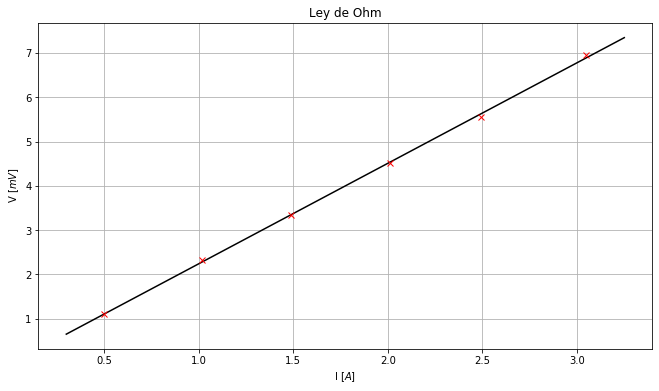

In [111]:
plt.figure(figsize = (11,6))
plt.grid(True)


'''Ploteamos os puntos experimentais'''

plt.errorbar(x, y, yerr = sy, marker = 'x', color = 'r', linestyle = '', label = 'Puntos Experimentais')

'''Calculamos e ploteamos a curva'''


xt=np.linspace(x[0]-0.2,x[-1]+0.2,1000) #Aquí eu recomendovos restar un pouco ao primeiro valor e sumar un pouco ao último, queda máis bonito
yt=funcion_axuste(xt,*coef)

plt.plot(xt, yt, 'k-', label = 'Axuste')

plt.title(titulo)
plt.xlabel(label_x)
plt.ylabel(label_y)
plt.plot()
plt.show()
#╣plt.savefig('Ajuste12.png')